In [5]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/294.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import required libraries for data handling, modeling, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Load data from Apple's stock CSV file
apple_stock = pd.read_csv("C:\\Users\\Poojith\\Downloads\\AAPL.csv")

# Display initial data and structure of the DataFrame
apple_stock.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,01-05-23,169.279999,170.449997,168.639999,169.589996,168.689575,52472900
1,02-05-23,170.089996,170.350006,167.539993,168.539993,167.645157,48425700
2,03-05-23,169.500000,170.919998,167.160004,167.449997,166.560944,65136000
3,04-05-23,164.889999,167.039993,164.309998,165.789993,164.909760,81235400
4,05-05-23,170.979996,174.300003,170.759995,173.570007,172.648468,113316400


In [7]:
print("Number of trading sessions recorded:", apple_stock.shape)


Number of trading sessions recorded: (251, 7)


Data columns available: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


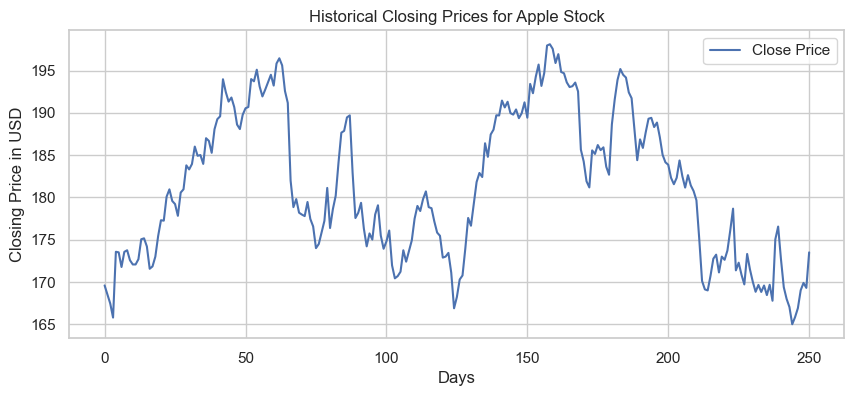

In [8]:
# Set visual style for plots
sns.set(style="whitegrid")

# Print all column headers to verify data fields
print("Data columns available:", apple_stock.columns)

# Rename 'Close' column to 'Close Price' for consistency if needed
if "Close Price" not in apple_stock.columns:
    if "Close" in apple_stock.columns:
        apple_stock.rename(columns={"Close": "Close Price"}, inplace=True)

# Visualize the closing price history
if "Close Price" in apple_stock.columns:
    plt.figure(figsize=(10, 4))
    plt.title("Historical Closing Prices for Apple Stock")
    plt.xlabel("Days")
    plt.ylabel("Closing Price in USD")
    plt.plot(apple_stock["Close Price"], label="Close Price")
    plt.legend()
    plt.show()
else:
    print("No 'Close Price' column found in the DataFrame.")


In [9]:
# Isolate 'Close Price' in the DataFrame
apple_stock = apple_stock[['Close Price']]

# Display a snippet of the refined DataFrame
print(apple_stock.head())


   Close Price
0   169.589996
1   168.539993
2   167.449997
3   165.789993
4   173.570007


In [10]:
# Define a prediction window of 30 days into the future
prediction_window = 30

# Create a target column for future predictions by shifting 'Close Price'
apple_stock['Future Price'] = apple_stock['Close Price'].shift(-prediction_window)

# Display structure of the adjusted DataFrame
print(apple_stock.head())
print(apple_stock.tail())


   Close Price  Future Price
0   169.589996    183.309998
1   168.539993    183.949997
2   167.449997    186.009995
3   165.789993    184.919998
4   173.570007    185.009995
     Close Price  Future Price
246   166.899994           NaN
247   169.020004           NaN
248   169.889999           NaN
249   169.300003           NaN
250   173.500000           NaN


In [11]:
# Prepare feature and target datasets
X = np.array(apple_stock.drop(['Future Price'], axis=1))[:-prediction_window]
y = np.array(apple_stock['Future Price'])[:-prediction_window]


In [12]:
# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


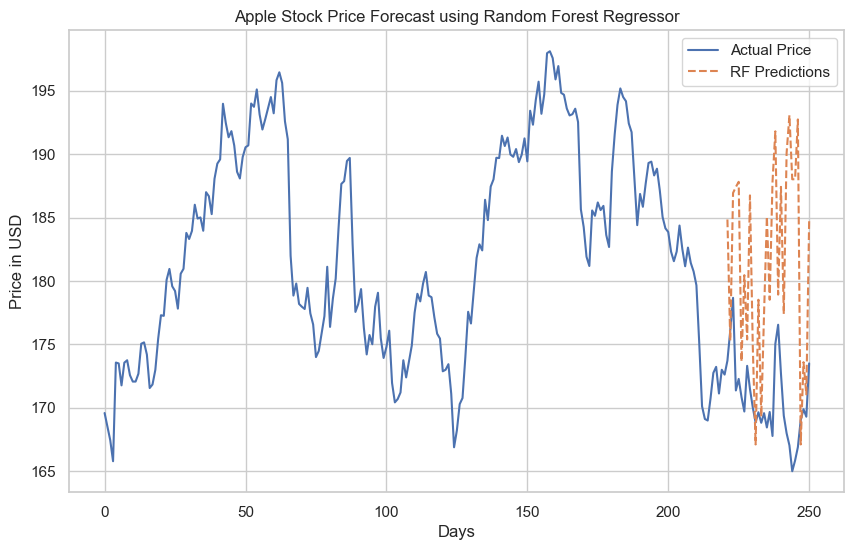

In [13]:
# Instantiate and train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Prepare future data points for prediction
X_future = scaler.transform(apple_stock.drop(['Future Price'], axis=1)[-prediction_window:].to_numpy())

# Generate predictions using the Random Forest model
rf_predictions = rf_model.predict(X_future)

# Create a full-length NaN array for predictions to fit the DataFrame
full_length_predictions = np.empty(len(apple_stock))
full_length_predictions[:] = np.nan
full_length_predictions[-len(rf_predictions):] = rf_predictions

# Assign predictions to the DataFrame
apple_stock['RF Predictions'] = full_length_predictions

# Visualize predictions against actual closing prices
plt.figure(figsize=(10, 6))
plt.title("Apple Stock Price Forecast using Random Forest Regressor")
plt.xlabel("Days")
plt.ylabel("Price in USD")
plt.plot(apple_stock['Close Price'], label='Actual Price')
plt.plot(apple_stock['RF Predictions'], label='RF Predictions', linestyle='--')
plt.legend()
plt.show()

C:\Users\Poojith\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 502ms/step - loss: 0.4747 - val_loss: 0.0101
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 0.0980 - val_loss: 0.0527
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.0709 - val_loss: 0.0256
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.0338 - val_loss: 0.0111
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.0412 - val_loss: 0.0121
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 0.0344 - val_loss: 0.0211
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 0.0306 - val_loss: 0.0307
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 0.0311 - val_loss: 0.0232
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.0253 - val_loss: 0.0176
Epoch 10/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 0.0261 - val_loss: 0.0169
Epoch 11/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0281 - val_loss: 0.0179
Epoch 12/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.0260 - val_l

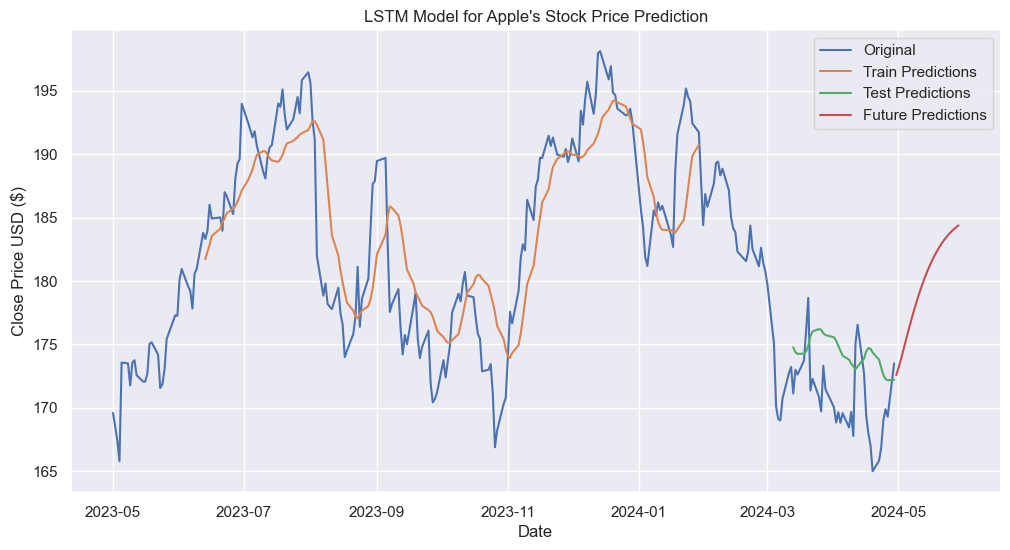

In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
apple = pd.read_csv("C:\\Users\\Poojith\\Downloads\\AAPL.csv")
apple['Date'] = pd.to_datetime(apple['Date'])
apple.set_index('Date', inplace=True)

# Keeping only the 'Close' price column
apple = apple[['Close']]

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
apple['Close'] = scaler.fit_transform(apple[['Close']])

# Function to create dataset for LSTM
def create_dataset(data, look_back=30):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Convert the dataframe into a numpy array
data = apple.values

# Splitting data into training and testing sets
train_size = int(len(data) * 0.75)
train_data, test_data = data[:train_size], data[train_size:]

# Creating sequences
look_back = 30
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Ensure there are valid entries in both sets before reshaping
if X_train.size > 0 and X_test.size > 0:
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
else:
    raise ValueError("Not enough data for training or testing")

# Building the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

# Making predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scaling to get back to original values
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Preparing ranges for visualization
train_range = np.arange(look_back, len(train_predictions) + look_back)
test_range = np.arange(len(train_data) + look_back, len(data))

# Ensure consistency between ranges and predictions
train_range = train_range[:len(train_predictions)]
test_range = test_range[:len(test_predictions)]

# Function for future predictions
def predict_future(data, model, steps, look_back=30):
    future_predictions = []
    input_data = data[-look_back:]

    for _ in range(steps):
        input_data = input_data.reshape(1, look_back, 1)
        future_value = model.predict(input_data)
        future_predictions.append(future_value[0, 0])

        input_data = np.append(input_data.flatten(), future_value[0, 0])
        input_data = input_data[-look_back:]

    return np.array(future_predictions)

# Making future predictions
future_steps = 30  # Define how many steps ahead to predict
future_predictions = predict_future(data, model, future_steps, look_back)

# Extend the date range to accommodate the future predictions
future_dates = pd.date_range(apple.index[-1] + pd.Timedelta(days=1), periods=future_steps)

# Printing the future values
print("Predicted future values for the next 30 days:")
for date, prediction in zip(future_dates, scaler.inverse_transform(future_predictions.reshape(-1, 1))):
    print(f"{date.strftime('%Y-%m-%d')}: ${prediction[0]:.2f}")

# Visualization
plt.figure(figsize=(12, 6))

# Plotting the original data
plt.plot(apple.index, scaler.inverse_transform(data), label='Original')

# Plotting the training predictions
plt.plot(apple.index[train_range], train_predictions, label='Train Predictions')

# Plotting the test predictions
plt.plot(apple.index[test_range], test_predictions, label='Test Predictions')

# Plotting future predictions
plt.plot(future_dates, scaler.inverse_transform(future_predictions.reshape(-1, 1)), label='Future Predictions')

plt.legend()
plt.title("LSTM Model for Apple's Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.show()


Epoch 1/50


C:\Users\Poojith\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 0.2032 - val_loss: 0.0525
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0543 - val_loss: 0.0211
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0349 - val_loss: 0.0161
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0367 - val_loss: 0.0372
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0347 - val_loss: 0.0420
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0341 - val_loss: 0.0267
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0295 - val_loss: 0.0260
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0290 - val_loss: 0.0327
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0254 - val_loss: 0.0315
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0248 - val_loss: 0.0313
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0265 - val_loss: 0.0280
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0282 - val_loss: 0.0279
Epoch 13/50

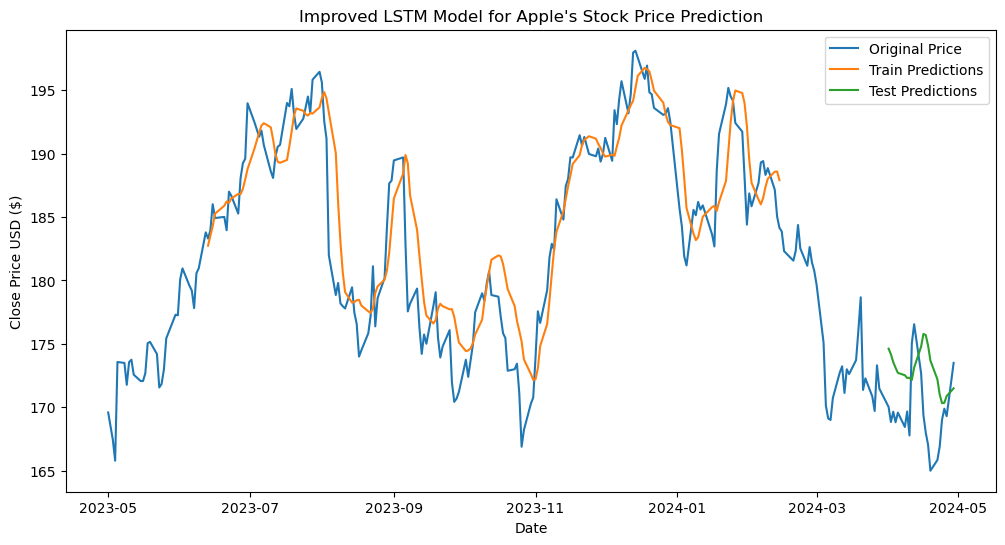

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the dataset
apple = pd.read_csv("C:\\Users\\Poojith\\Downloads\\AAPL.csv")
apple['Date'] = pd.to_datetime(apple['Date'], format='%d-%m-%y')
apple.set_index('Date', inplace=True)

# Keeping only the 'Close' price column
apple = apple[['Close']]

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
apple['Close'] = scaler.fit_transform(apple[['Close']])

# Function to create dataset for LSTM
def create_dataset(data, look_back=30):  # Reduced from 60 to 30
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Convert the dataframe into a numpy array
data = apple.values

# Splitting data into training and testing sets
train_size = int(len(data) * 0.80)
train_data, test_data = data[:train_size], data[train_size:]

# Creating sequences
look_back = 30  # Reduced from 60 to 30
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

if X_test.size > 0:
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
else:
    raise ValueError("Still not enough data in the test set for predictions. Consider further reducing the look-back period or using more data.")

# Building the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Making predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scaling to get back to original values
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train_rescaled = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(apple.index, scaler.inverse_transform(data), label='Original Price')
plt.plot(apple.index[look_back:len(train_predictions)+look_back], train_predictions, label='Train Predictions')
plt.plot(apple.index[len(train_data)+look_back:], test_predictions, label='Test Predictions')
plt.legend()
plt.title("Improved LSTM Model for Apple's Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.show()


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch
import matplotlib.pyplot as plt

# Load the dataset
apple = pd.read_csv("C:\\Users\\Poojith\\Downloads\\AAPL.csv")
apple['Date'] = pd.to_datetime(apple['Date'], format='%d-%m-%y')
apple.set_index('Date', inplace=True)

# Keeping only the 'Close' price column
apple = apple[['Close']]

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
apple['Close'] = scaler.fit_transform(apple[['Close']])

# Function to create dataset for LSTM
def create_dataset(data, look_back=30):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Convert the dataframe into a numpy array
data = apple.values

# Cross-validation setup
tscv = TimeSeriesSplit(n_splits=5)

# Define the model-building function for hyperparameter tuning
def build_model(hp):
    model = Sequential([
        LSTM(hp.Int('lstm_units', min_value=20, max_value=100, step=20), return_sequences=True, input_shape=(30, 1)),
        Dropout(hp.Float('dropout_1', min_value=0, max_value=0.5, step=0.1)),
        LSTM(hp.Int('lstm_units', min_value=20, max_value=100, step=20), return_sequences=False),
        Dropout(hp.Float('dropout_2', min_value=0, max_value=0.5, step=0.1)),
        Dense(hp.Int('dense_units', min_value=10, max_value=50, step=10)),
        Dense(1)
    ])
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='mean_squared_error')
    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # number of different configurations to try
    executions_per_trial=2,  # number of models to build per trial
    directory='my_dir',
    project_name='lstm_stock_price'
)

for train_index, test_index in tscv.split(data):
    train_data, test_data = data[train_index], data[test_index]
    X_train, y_train = create_dataset(train_data, 30)
    X_test, y_test = create_dataset(test_data, 30)

    # Check if test data is enough
    if X_test.size > 0:
        X_train = X_train.reshape((X_train.shape[0], 30, 1))
        X_test = X_test.reshape((X_test.shape[0], 30, 1))
        # Execute the search
        tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)
    else:
        print("Not enough data in the test set for predictions.")

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Example on how to use the best model (this part will need adapting based on the use case)
# Predict using best_model
#best_model.evaluate(X_test, y_test)


Reloading Tuner from my_dir\lstm_stock_price\tuner0.json


C:\Users\Poojith\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Poojith\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Reloading Tuner from my_dir\lstm_stock_price\tuner0.json


C:\Users\Poojith\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - loss: 0.4418 - val_loss: 0.0577
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1382 - val_loss: 0.1976
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 0.0244 - val_loss: 0.2342
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - loss: 0.0583 - val_loss: 0.0483
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - loss: 0.0012 - val_loss: 0.0309
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 0.0217 - val_loss: 0.0344
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - loss: 0.0370 - val_loss: 0.0292
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 0.0239 - val_loss: 0.0267
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 0.0120 - val_loss: 0.0409
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - loss: 0.0032 - val_loss: 0.0678
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - loss: 0.0158 - val_loss: 0.0738
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 0.0170 - val_loss: 

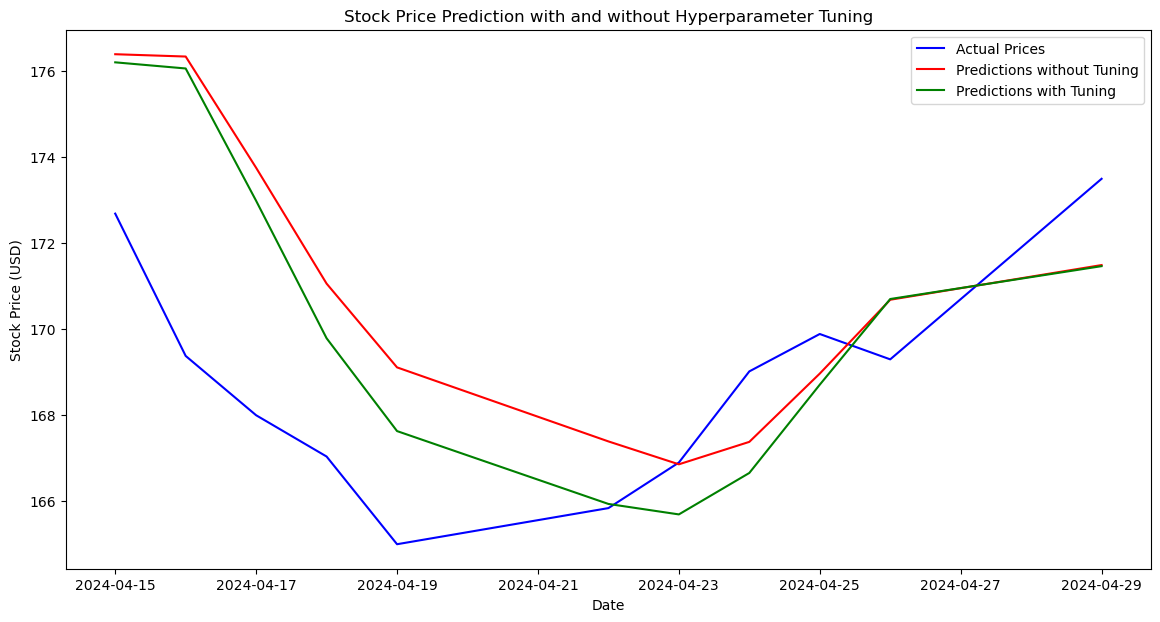

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch
import matplotlib.pyplot as plt

# Load the dataset
apple = pd.read_csv("C:\\Users\\Poojith\\Downloads\\AAPL.csv")
apple['Date'] = pd.to_datetime(apple['Date'], format='%d-%m-%y')
apple.set_index('Date', inplace=True)

# Keeping only the 'Close' price column
apple = apple[['Close']]

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
apple_scaled = scaler.fit_transform(apple[['Close']])

# Function to create dataset for LSTM
def create_dataset(data, look_back=30):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Convert the dataframe into a numpy array
data = apple_scaled

# Cross-validation setup
tscv = TimeSeriesSplit(n_splits=5)

# Define the model-building function for hyperparameter tuning
def build_model(hp):
    model = Sequential([
        LSTM(hp.Int('lstm_units', min_value=20, max_value=100, step=20), return_sequences=True, input_shape=(30, 1)),
        Dropout(hp.Float('dropout_1', min_value=0, max_value=0.5, step=0.1)),
        LSTM(hp.Int('lstm_units', min_value=20, max_value=100, step=20), return_sequences=False),
        Dropout(hp.Float('dropout_2', min_value=0, max_value=0.5, step=0.1)),
        Dense(hp.Int('dense_units', min_value=10, max_value=50, step=10)),
        Dense(1)
    ])
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='mean_squared_error')
    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # number of different configurations to try
    executions_per_trial=2,  # number of models to build per trial
    directory='my_dir',
    project_name='lstm_stock_price'
)

best_val_loss = np.inf
best_model = None

for train_index, test_index in tscv.split(data):
    train_data, test_data = data[train_index], data[test_index]
    X_train, y_train = create_dataset(train_data, 30)
    X_test, y_test = create_dataset(test_data, 30)

    # Check if test data is enough
    if X_test.size > 0:
        X_train = X_train.reshape((X_train.shape[0], 30, 1))
        X_test = X_test.reshape((X_test.shape[0], 30, 1))
        # Execute the search
        tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)
        
        # Checking and saving the best model across all folds
        tuner_results = tuner.get_best_hyperparameters(num_trials=1)[0]
        model = build_model(tuner_results)
        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
        val_loss = model.evaluate(X_test, y_test, verbose=0)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model
    else:
        print("Not enough data in the test set for predictions.")

# Train a simple model without tuning
simple_model = build_model(RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=1,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_stock_price'
).get_best_hyperparameters(num_trials=1)[0])
simple_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Making predictions
simple_predictions = simple_model.predict(X_test)
simple_predictions = scaler.inverse_transform(simple_predictions)

# Predictions from tuned model
tuned_predictions = best_model.predict(X_test)
tuned_predictions = scaler.inverse_transform(tuned_predictions)

# Actual prices
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(apple.index[-len(actual_prices):], actual_prices, label='Actual Prices', color='blue')
plt.plot(apple.index[-len(actual_prices):], simple_predictions, label='Predictions without Tuning', color='red')
plt.plot(apple.index[-len(actual_prices):], tuned_predictions, label='Predictions with Tuning', color='green')
plt.title('Stock Price Prediction with and without Hyperparameter Tuning')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


In [17]:
import pandas as pd

# Ensure predictions and actual values are the same length for comparison
min_length = min(len(actual_prices), len(simple_predictions), len(tuned_predictions))

# Create a DataFrame to hold the actual and predicted values
results_df = pd.DataFrame({
    'Actual Prices': actual_prices.flatten()[:min_length],
    'Predictions without Tuning': simple_predictions.flatten()[:min_length],
    'Predictions with Tuning': tuned_predictions.flatten()[:min_length]
}, index=apple.index[-min_length:])

# Display the DataFrame
print(results_df.head(10))  # Display first 10 rows to check

# Optionally, save this DataFrame to a CSV file
results_df.to_csv("prediction_results.csv")


            Actual Prices  Predictions without Tuning  Predictions with Tuning
Date                                                                          
2024-04-15     172.690002                  176.397675               176.208954
2024-04-16     169.380005                  176.343887               176.066162
2024-04-17     168.000000                  173.755890               172.988052
2024-04-18     167.039993                  171.062088               169.790970
2024-04-19     165.000000                  169.113403               167.631699
2024-04-22     165.839996                  167.391510               165.936920
2024-04-23     166.899994                  166.858749               165.693512
2024-04-24     169.020004                  167.380630               166.657486
2024-04-25     169.889999                  168.969131               168.710770
2024-04-26     169.300003                  170.686508               170.703659
